In [2]:
# importing packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 
from sklearn import metrics

In [3]:
# open data
df = pd.read_csv('/Users/SnehPandya/Desktop/DeepLearningAGN/data/tau_fulldata_matched2.csv',index_col = 0)
df.head()

,ID,RA,DEC,Mass_ground_truth,ERR,z,tau,tau_lim_lo,tau_lim_hi,M_tau,mu,M_i
0,301,2.169302,1.238649,7.523331,1.523093,1.0730,1.99550,1.53265,3.72459,7.652679,20.7869,-23.901
1,144,1.091028,0.962126,8.817950,0.167267,0.7867,2.27673,2.08917,4.02532,8.154875,20.7824,-23.399
2,58,0.331289,0.177230,8.921718,0.204242,1.6199,1.87484,1.62701,3.03110,7.437214,20.5453,-24.735
3,190,1.364696,-0.098956,9.022211,0.267495,0.6125,2.47534,2.32222,4.21751,8.509536,19.8859,-23.121
4,36,0.221552,-0.292485,9.249395,0.057662,2.7563,1.70714,1.28728,3.62220,7.137750,20.6848,-26.451


In [4]:
df = df.drop(columns = ['ID','z', 'ERR', 'RA','DEC','tau_lim_lo','tau_lim_hi','M_tau','tau','mu'])
df.head()

,Mass_ground_truth,M_i
0,7.523331,-23.901
1,8.817950,-23.399
2,8.921718,-24.735
3,9.022211,-23.121
4,9.249395,-26.451


In [5]:
array = df.to_numpy()
array

array([[  7.52333061, -23.901     ],
       [  8.81795034, -23.399     ],
       [  8.92171817, -24.735     ],
       ..., 
       [  8.45017379, -24.37      ],
       [  8.02155865, -23.1       ],
       [  8.98848251, -24.63      ]])

In [7]:
mi_array = array[:,1].reshape(-1,1)
mass_array = array[:,0]
print(mi_array)
print(mass_array)

[[-23.901]
 [-23.399]
 [-24.735]
 ..., 
 [-24.37 ]
 [-23.1  ]
 [-24.63 ]]
[ 7.52333061  8.81795034  8.92171817 ...,  8.45017379  8.02155865
  8.98848251]


In [16]:
#split train and test set (X -> tau, y -> mass)
X_train, X_test, y_train, y_test = train_test_split(mi_array, mass_array, test_size=0.2, random_state=0)

In [17]:
#define regression and train it
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [11]:
# retrieve line of best fit attributes
print(regressor.intercept_) # y-intercept (b)
print(regressor.coef_) # slope (m)
print(regressor.score(X_test,y_test)) #(r^2 score)

2.92700231229
[-0.23671964]
0.395905178004


In [12]:
# apply regression on test set
y_pred_test = regressor.predict(X_test)
y_pred_train = regressor.predict(X_train)

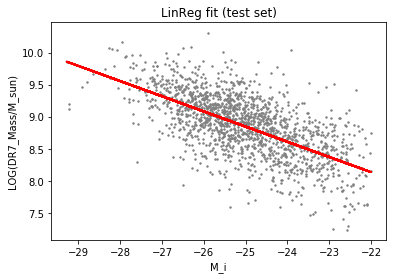

In [13]:
# plotting
plt.scatter(X_test, y_test,  color='gray',s=2)
plt.plot(X_test, y_pred_test, color='red', linewidth=2)
plt.xlabel('M_i')
plt.ylabel('LOG(DR7_Mass/M_sun)')
plt.title('LinReg fit (test set)')
plt.show()

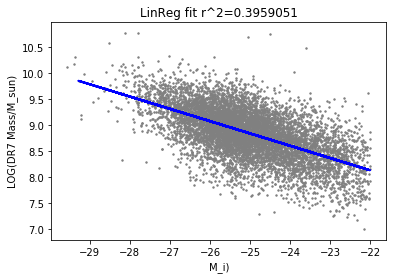

In [14]:
plt.scatter(X_test, y_test,  color='gray',s=2)
plt.scatter(X_train,y_train,color='gray',s=2)
plt.plot(X_test, y_pred_test, color='blue', linewidth=2)
plt.xlabel('M_i)')
plt.ylabel('LOG(DR7 Mass/M_sun)')
plt.title('LinReg fit r^2=' + str(regressor.score(X_test,y_test))[0:9])
plt.show()

In [15]:
# statistics
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)))

Root Mean Squared Error: 0.372930469362
